# Lesson 5
# Renuka Mulay


Read the Automobile Data Set from Internet and Assign Columns Names.

In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

#Read the Automobile data from Internet and Assign Columns Names.
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]
originalData = pd.read_csv('https://raw.githubusercontent.com/renukamulay/NoteBookShare/master/data/automobile.csv', 
                          header=None, names=headers, na_values="?")

#Select a subset of data for analysis.
subsetData = originalData[['wheel_base', 'curb_weight', 'num_cylinders', 'drive_wheels', 'num_doors', 'horsepower']].copy()

Normalize (Min-Max Normalization) numeric values of Column (wheel base)

In [295]:
print(f""" Before Normilization {subsetData['wheel_base'].head(5)}""")

# Select the Column to Min-Max Normalize
columnToNormalize = ['wheel_base']

# Import the SkLearn classes for MinMax Normalization.
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(subsetData[columnToNormalize])

# Set the Normalized Columns to the Original DataSet.
subsetData['wheel_base'] = pd.DataFrame(minmax_scaler.transform(subsetData[columnToNormalize]))

print(f""" After Normilization {subsetData[columnToNormalize].head(5)}""")

 Before Normilization 0    88.6
1    88.6
2    94.5
3    99.8
4    99.4
Name: wheel_base, dtype: float64
 After Normilization    wheel_base
0    0.058309
1    0.058309
2    0.230321
3    0.384840
4    0.373178


Bin numeric variables. Column = Curb Weights.

Bins
1. 0 - 2000   Low
2. 2000 - 3500    Medium
3. 3500 - 5000   High


In [296]:
print(f"""Before Binning {subsetData['curb_weight'].head(5)}""")

# Create the bins and apply pd.cut to bin the numeric data into categories.
bins = [0, 2000, 3500, 5000]
labels = ['Low', 'Medium', 'High']
subsetData['curb_weight'] = pd.cut(subsetData['curb_weight'], bins=bins, labels=labels)

# Set the Type to Category.
subsetData['curb_weight'] = subsetData['curb_weight'].astype('category')

print(f"""After Binning {subsetData['curb_weight'].head(5)}""")

Before Binning 0    2548
1    2548
2    2823
3    2337
4    2824
Name: curb_weight, dtype: int64
After Binning 0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
Name: curb_weight, dtype: category
Categories (3, object): [Low < Medium < High]


Inspect the categorical data and impute missing categories.

In [297]:
# Find if there are any NAN values in the Category Columns
subsetData[subsetData.isnull().any(axis=1)]

# num_doors has 2 rows with NAN values and replace them with the Mode of the num_doors data, which is four in this case.
counts = subsetData["num_doors"].value_counts()
subsetData = subsetData.fillna({"num_doors": counts.index[0]})

Consolidate categorical data. 

In [298]:
print(f"""Before Consolidation {subsetData.head(5)}""")
# Convert the num of cylinders into number.
numbers = {"num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8, "two": 2, "twelve": 12, "three":3 }}
subsetData.replace(numbers, inplace=True)

# Consolidate the cateogories into 2 categories 1) Upto5Cylinders  2) MoreThan5Cylinders
consolidateCategories = {"Upto5Cylinders" : [2,3,4,5],
      "MoreThan5Cylinders" : [6,8,12]}
distribution = {v: k for k,vv in consolidateCategories.items() for v in vv}
subsetData['num_cylinders'] = subsetData['num_cylinders'].map(distribution).astype(pd.api.types.CategoricalDtype(categories=set(m2.values())))
subsetData.head(5)

Before Consolidation    wheel_base curb_weight num_cylinders drive_wheels num_doors  horsepower
0    0.058309      Medium          four          rwd       two       111.0
1    0.058309      Medium          four          rwd       two       111.0
2    0.230321      Medium           six          rwd       two       154.0
3    0.384840      Medium          four          fwd      four       102.0
4    0.373178      Medium          five          4wd      four       115.0


,wheel_base,curb_weight,num_cylinders,drive_wheels,num_doors,horsepower
0,0.058309,Medium,Upto5Cylinders,rwd,two,111.0
1,0.058309,Medium,Upto5Cylinders,rwd,two,111.0
2,0.230321,Medium,MoreThan5Cylinders,rwd,two,154.0
3,0.384840,Medium,Upto5Cylinders,fwd,four,102.0
4,0.373178,Medium,Upto5Cylinders,4wd,four,115.0


One-hot encode categorical data with at least 3 categories (at least 1 column).

In [299]:
# Onehot encode the column drive_Wheels using the Pandas Method : get_dummies.
subsetData = pd.get_dummies(subsetData, columns=["drive_wheels"])

# Validate that the column is OneHotEncoded.
subsetData.head(5)

,wheel_base,curb_weight,num_cylinders,num_doors,horsepower,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,0.058309,Medium,Upto5Cylinders,two,111.0,0,0,1
1,0.058309,Medium,Upto5Cylinders,two,111.0,0,0,1
2,0.230321,Medium,MoreThan5Cylinders,two,154.0,0,0,1
3,0.384840,Medium,Upto5Cylinders,four,102.0,0,1,0
4,0.373178,Medium,Upto5Cylinders,four,115.0,1,0,0


Remove obsolete columns. Columns Name : HorsePower.

In [300]:
print(f"""Before Dropping {subsetData.head(5)}""")

# Drop the column horsepower as it is not needed for further analysis.
subsetData = subsetData.drop(['horsepower'], axis=1)

subsetData.head(5)


Before Dropping    wheel_base curb_weight       num_cylinders num_doors  horsepower  \
0    0.058309      Medium      Upto5Cylinders       two       111.0   
1    0.058309      Medium      Upto5Cylinders       two       111.0   
2    0.230321      Medium  MoreThan5Cylinders       two       154.0   
3    0.384840      Medium      Upto5Cylinders      four       102.0   
4    0.373178      Medium      Upto5Cylinders      four       115.0   

   drive_wheels_4wd  drive_wheels_fwd  drive_wheels_rwd  
0                 0                 0                 1  
1                 0                 0                 1  
2                 0                 0                 1  
3                 0                 1                 0  
4                 1                 0                 0  


,wheel_base,curb_weight,num_cylinders,num_doors,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,0.058309,Medium,Upto5Cylinders,two,0,0,1
1,0.058309,Medium,Upto5Cylinders,two,0,0,1
2,0.230321,Medium,MoreThan5Cylinders,two,0,0,1
3,0.384840,Medium,Upto5Cylinders,four,0,1,0
4,0.373178,Medium,Upto5Cylinders,four,1,0,0


Plot Category Columns

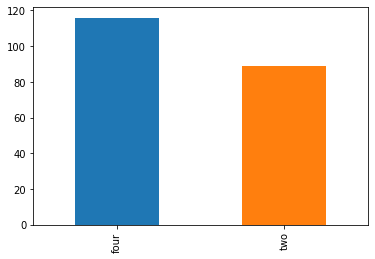

In [301]:
subsetData['num_doors'].value_counts().plot(kind='bar')

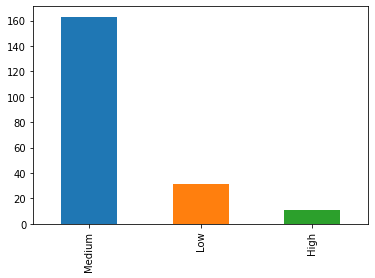

In [302]:
subsetData['curb_weight'].value_counts().plot(kind='bar')

Summary

Add a summary comment block on how the categorical variables have been treated: decoded, imputed, consolidated, and one-hot encoded. Which attributes were plotted and why?

Q) How the Category Column were decoded?
A) After loading the data into DataFrame, I checked the types of the columns and found that the columns with datatype=object qualified as Category Columns.


Q) How the Category Column were imputed?
A) First I found out all the NAN values in the category columns. num_doors had 2 rows with NAN and replaced them with the mode of the num_doors data using fillna function of Pandas.


Q) How the Category Column were consolidated?
A) I consolidated the num_cylinders into 2 categories from the existing 7 categories. This was done using the Replace function to convert the categories to numbers and then using the map function to map the categories.

Q) How the Category Column were one-hot encoded?
A) drive_wheels column was one-hot encoded using the Pandas get_dummies function.

Q) Which attributes were plotted and why?
A) I chose to plot the curb_weight and num_doors columns. This plot gives an idea of how the category values are distributed.
